In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import PIL, cv2, os
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [4]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [7]:
image_count

3732

In [8]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

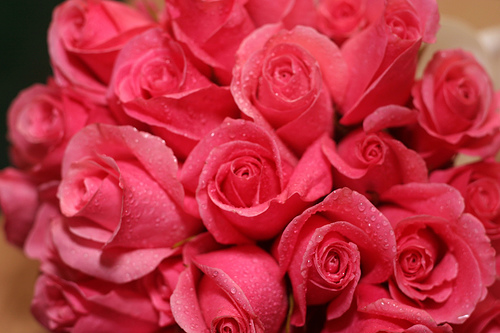

In [9]:
PIL.Image.open(str(roses[1]))

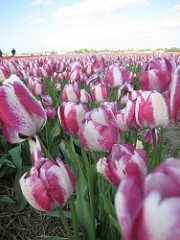

In [10]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [11]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [11]:
flowers_images_dict['roses'][0]

PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg')

In [12]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [13]:
img.shape

(240, 178, 3)

In [14]:
cv2.resize(img, (128, 128)).shape

(128, 128, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(128,128))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [19]:
tf.keras.backend.clear_session()

In [20]:
num_classes = len(flowers_labels_dict)

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.fit(X_train_scaled, y_train, batch_size=64, epochs=20)

Epoch 1/20


2023-12-21 09:44:07.529327: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 541065216 exceeds 10% of free system memory.


43/43 [==============================] - 26s 554ms/step - loss: 1.3136 - accuracy: 0.4222
Epoch 2/20
43/43 [==============================] - 23s 534ms/step - loss: 1.0377 - accuracy: 0.5894
Epoch 3/20
43/43 [==============================] - 23s 529ms/step - loss: 0.8754 - accuracy: 0.6682
Epoch 4/20
43/43 [==============================] - 25s 593ms/step - loss: 0.7297 - accuracy: 0.7249
Epoch 5/20
43/43 [==============================] - 25s 592ms/step - loss: 0.5986 - accuracy: 0.7740
Epoch 6/20
43/43 [==============================] - 27s 617ms/step - loss: 0.4451 - accuracy: 0.8463
Epoch 7/20
43/43 [==============================] - 26s 596ms/step - loss: 0.3369 - accuracy: 0.8852
Epoch 8/20
43/43 [==============================] - 22s 515ms/step - loss: 0.2114 - accuracy: 0.9284
Epoch 9/20
43/43 [==============================] - 22s 515ms/step - loss: 0.1766 - accuracy: 0.9488
Epoch 10/20
43/43 [==============================] - 22s 512ms/step - loss: 0.0947 - accuracy: 0.9782


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 70ms/step - loss: 2.0591 - accuracy: 0.6590


[2.0590927600860596, 0.6590414047241211]

In [24]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(128, 
                                                              128,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [25]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20)  

2023-12-21 09:52:19.421274: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 541065216 exceeds 10% of free system memory.


Epoch 1/20
86/86 [==============================] - 29s 307ms/step - loss: 1.3036 - accuracy: 0.4360
Epoch 2/20
86/86 [==============================] - 26s 306ms/step - loss: 1.0292 - accuracy: 0.5901
Epoch 3/20
86/86 [==============================] - 30s 345ms/step - loss: 0.9315 - accuracy: 0.6424
Epoch 4/20
86/86 [==============================] - 26s 307ms/step - loss: 0.8763 - accuracy: 0.6526
Epoch 5/20
86/86 [==============================] - 29s 341ms/step - loss: 0.8207 - accuracy: 0.6817
Epoch 6/20
86/86 [==============================] - 31s 364ms/step - loss: 0.7672 - accuracy: 0.7002
Epoch 7/20
86/86 [==============================] - 32s 374ms/step - loss: 0.7435 - accuracy: 0.7115
Epoch 8/20
86/86 [==============================] - 25s 296ms/step - loss: 0.7310 - accuracy: 0.7108
Epoch 9/20
86/86 [==============================] - 26s 297ms/step - loss: 0.7073 - accuracy: 0.7267
Epoch 10/20
86/86 [==============================] - 26s 297ms/step - loss: 0.6591 - accura

In [26]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 2s 68ms/step - loss: 0.8285 - accuracy: 0.7386


[0.8285362720489502, 0.7385621070861816]